This notebook explores the possible correlations between number of counts per subject and demographic characteristics

In [1]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)

Importing files

In [2]:
PATH = 'count_matrix2_new.csv.gz'

###Use the code below if you want to see all the columns and only 5 rows (for example)
df_tmp = pd.read_csv(PATH)

In [3]:
df_tmp.head(5)

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,0,0,2514,2496,2487,2463,2318,2318,...,1257,1140,1140,0,1409,1303,1250,1237,1124,1124
1,02-2483-10A,579304076,0,0,2233,2224,2215,2201,2058,2058,...,1133,1038,1038,0,1266,1172,1127,1120,1027,1027
2,02-2485-01A,575060540,0,0,2459,2441,2434,2416,2268,2268,...,1229,1134,1134,0,1384,1273,1215,1210,1118,1118
3,02-2485-10A,478851061,0,0,1967,1955,1948,1936,1805,1805,...,1147,1061,1061,0,1260,1172,1132,1127,1043,1043
4,06-0125-01A,1066268796,0,0,3560,3533,3520,3488,3317,3317,...,2004,1737,1737,0,2596,2202,2014,1984,1721,1721


This code will show the unique values. However, note that is taking the Normal and Tumor tissue in account.

In [4]:
#print(df_tmp['subject'].value_counts())

Extracts the IDs and remove the sample to later clean up the demographics sample.

In [61]:
ids=df_tmp['subject']
ids.to_list()
remove = ['-01A', '-02B', '-10A', '-02A','-10B','-10D', '-11A', '-01B', 'TCGA-']
ids = pd.Series(ids)
ids = ids.str.replace('|'.join(map(re.escape, remove)),'')
ids.tolist()
print(len(ids))

147


<ipython-input-61-98d9c901ed52>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ids = ids.str.replace('|'.join(map(re.escape, remove)),'')


0      02-2483
1      02-2483
2      02-2485
3      02-2485
4      06-0125
5      06-0125
6      06-0157
7      06-0157
8      06-0171
9      06-0171
10     06-0190
11     06-0190
12     06-0210
13     06-0210
14     06-0211
15     06-0211
16     06-0214
17     06-0214
18     06-0221
19     06-0221
20     06-0686
21     06-0686
22     06-0744
23     06-0744
24     06-0745
25     06-0745
26     06-2557
27     06-2557
28     06-2570
29     06-2570
30     06-5411
31     06-5411
32     06-5415
33     06-5415
34     14-1034
35     14-1034
36     14-1402
37     14-1402
38     14-1823
39     14-1823
40     14-2554
41     14-2554
42     15-1444
43     15-1444
44     19-1389
45     19-1389
46     19-2620
47     19-2620
48     19-2624
49     19-2624
50     19-2629
51     19-2629
52     19-5960
53     19-5960
54     26-5132
55     26-5132
56     26-5135
57     26-5135
58     27-1831
59     27-1831
60     27-2523
61     27-2523
62     27-2528
63     27-2528
64     32-1970
65     32-1970
66     41-

In [6]:
filtered_id = []
for i in ids:
    if i not in filtered_id:
        filtered_id.append(i)
print(len(filtered_id))

74


Importing the demographics data

In [7]:
meta_path = 'TCGA.Glioma.metadata.tsv' 
meta_data = pd.read_csv(meta_path,sep='\t')
meta_data.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


Filtering the available data

In [8]:
meta_data['case_submitter_id'] = meta_data['case_submitter_id'].str.replace('|'.join(map(re.escape, remove)),'')
meta_data['case_submitter_id'] = meta_data['case_submitter_id'].apply(str)
booleans = meta_data.case_submitter_id.isin(filtered_id)
meta_data = meta_data[booleans]
meta_data.head()

<ipython-input-8-d26a722084e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  meta_data['case_submitter_id'] = meta_data['case_submitter_id'].str.replace('|'.join(map(re.escape, remove)),'')


,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
90,02-2483,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
91,02-2485,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
96,06-0125,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
123,06-0157,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0
134,06-0171,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0


### Table 1

In [9]:
table1 = [meta_data['gender'].value_counts(), meta_data['race'].value_counts(), meta_data['ethnicity'].value_counts(), 
          meta_data['primary_diagnosis'].value_counts(), meta_data['Vital_status'].value_counts(), meta_data['Age'].describe()]
table1

[male      41
 female    33
 Name: gender, dtype: int64,
 white                        67
 black or african american     5
 asian                         1
 not reported                  1
 Name: race, dtype: int64,
 not hispanic or latino    62
 not reported               8
 hispanic or latino         4
 Name: ethnicity, dtype: int64,
 Glioblastoma                     34
 Oligodendroglioma, NOS           24
 Mixed glioma                      6
 Astrocytoma, anaplastic           5
 Oligodendroglioma, anaplastic     3
 Astrocytoma, NOS                  2
 Name: primary_diagnosis, dtype: int64,
 1.0    39
 0.0    31
 Name: Vital_status, dtype: int64,
 count    70.000000
 mean     49.628571
 std      14.655633
 min      17.000000
 25%      39.500000
 50%      51.000000
 75%      60.000000
 max      76.000000
 Name: Age, dtype: float64]

### Graphs

#### Histogram of overall age 

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


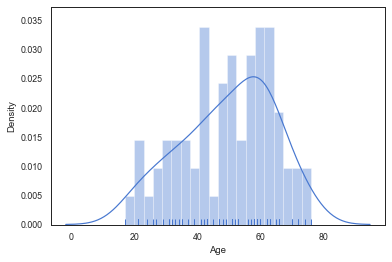

In [10]:
%matplotlib inline
sns.set(context='paper',style='white', palette='muted',color_codes=True)
sns.distplot(meta_data['Age'], hist=True, rug=True, bins=20)
plt.show()

#### Age by type of tumor

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

Text(0, 0.5, 'Density')

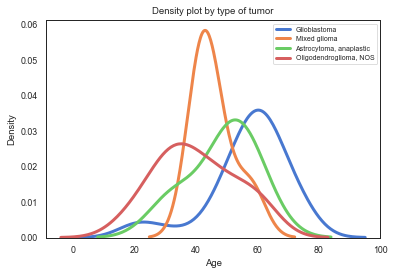

In [11]:
tumors=['Glioblastoma','Mixed glioma','Astrocytoma, anaplastic','Oligodendroglioma, NOS',
        'oligodendroglioma, anaplastic','Astrocytoma, NOS']

for tumor in tumors:
    subset=meta_data[meta_data['primary_diagnosis']==tumor]
    sns.distplot(subset['Age'], hist=False, kde=True, kde_kws={'linewidth':3},
                 label =tumor)
    
plt.legend(prop={'size':7})
plt.title('Density plot by type of tumor')
plt.xlabel('Age')
plt.ylabel('Density')

#### Survival months by type of tumor

<AxesSubplot:xlabel='Survival_months', ylabel='primary_diagnosis'>

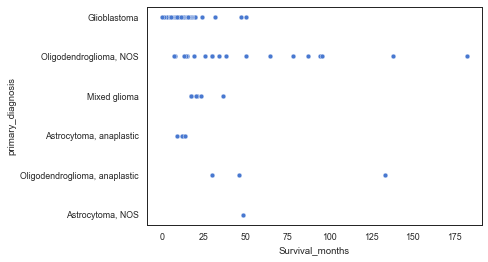

In [12]:
sns.scatterplot(data=meta_data, x='Survival_months',y='primary_diagnosis')

#### Count of IDH status

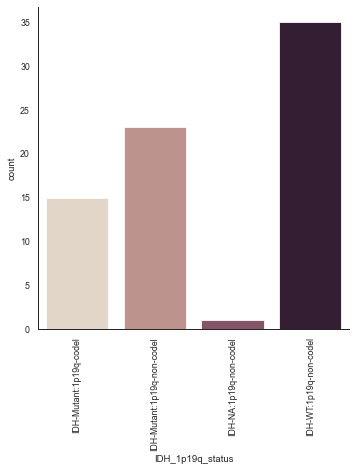

In [13]:
meta_data['IDH_1p19q_status']=meta_data['IDH_1p19q_status'].astype('category')

g1 = sns.catplot(x="IDH_1p19q_status", kind="count", palette="ch:.25", data=meta_data)
g1.set_xticklabels(rotation=90)

In [14]:
df_tmp['HERVK113 unpaired reads aligned']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

## Creating dataframes by each quality level

In [15]:
df_q00 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q00', case=False)]
df_q00.insert(0, 'subject',df_tmp['subject'])
df_q00.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q00['sample'] = df_q00['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q00['tissue_sample'] = np.where(df_q00['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q00['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q00['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q00['subject'] = df_q00['subject'].map(lambda x: str(x)[:-4])
print(len(df_q00.index))
df_q00.head()

147


<ipython-input-15-92090e8960cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q00['sample'] = df_q00['subject'].str.extract(r'\b(\w+)$',expand=True)
<ipython-input-15-92090e8960cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q00['tissue_sample'] = np.where(df_q00['sample'].str.contains('10'), 'Normal Blood',
<ipython-input-15-92090e8960cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,subject,raw pair count,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,HERVK113 paired human Q00 aligned,...,r100000 uniq SVA_F unpaired human Q00 aligned,SVA_F paired human Q00 aligned,uniq SVA_F paired human Q00 aligned,r10 uniq SVA_F paired human Q00 aligned,r100 uniq SVA_F paired human Q00 aligned,r1000 uniq SVA_F paired human Q00 aligned,r10000 uniq SVA_F paired human Q00 aligned,r100000 uniq SVA_F paired human Q00 aligned,sample,tissue_sample
0,02-2483,566024474,0,2514,2496,2487,2463,2318,2318,0,...,7702,0,1822,1663,1572,1551,1394,1394,01A,Primary Tumor
1,02-2483,579304076,0,2233,2224,2215,2201,2058,2058,0,...,6522,0,1640,1510,1433,1418,1295,1295,10A,Normal Blood
2,02-2485,575060540,0,2459,2441,2434,2416,2268,2268,0,...,6956,0,1820,1649,1544,1525,1392,1392,01A,Primary Tumor
3,02-2485,478851061,0,1967,1955,1948,1936,1805,1805,0,...,5661,0,1652,1518,1439,1426,1310,1310,10A,Normal Blood
4,06-0125,1066268796,0,3560,3533,3520,3488,3317,3317,0,...,12747,0,3408,2864,2514,2449,2102,2102,01A,Primary Tumor


In [16]:
print(df_q00['tissue_sample'].value_counts(), '\n', df_q00['sample'].value_counts() )

Normal Blood     74
Primary Tumor    73
Name: tissue_sample, dtype: int64 
 01A    72
10A    72
01B     1
10B     1
10D     1
Name: sample, dtype: int64


In [17]:
df_q10 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q10', case=False)]
df_q10.insert(0, 'subject',df_tmp['subject'])
df_q10.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q10['sample'] = df_q10['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q10['tissue_sample'] = np.where(df_q10['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q10['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q10['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q10['subject'] = df_q10['subject'].map(lambda x: str(x)[:-4])
print(len(df_q10.index))
df_q10.head()

147


<ipython-input-17-11a0c0c6df57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q10['sample'] = df_q10['subject'].str.extract(r'\b(\w+)$',expand=True)
<ipython-input-17-11a0c0c6df57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q10['tissue_sample'] = np.where(df_q10['sample'].str.contains('10'), 'Normal Blood',
<ipython-input-17-11a0c0c6df57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,subject,raw pair count,HERVK113 unpaired human Q10 aligned,uniq HERVK113 unpaired human Q10 aligned,r10 uniq HERVK113 unpaired human Q10 aligned,r100 uniq HERVK113 unpaired human Q10 aligned,r1000 uniq HERVK113 unpaired human Q10 aligned,r10000 uniq HERVK113 unpaired human Q10 aligned,r100000 uniq HERVK113 unpaired human Q10 aligned,HERVK113 paired human Q10 aligned,...,r100000 uniq SVA_F unpaired human Q10 aligned,SVA_F paired human Q10 aligned,uniq SVA_F paired human Q10 aligned,r10 uniq SVA_F paired human Q10 aligned,r100 uniq SVA_F paired human Q10 aligned,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,sample,tissue_sample
0,02-2483,566024474,0,543,531,529,522,417,417,0,...,1459,0,1435,1326,1270,1257,1140,1140,01A,Primary Tumor
1,02-2483,579304076,0,523,517,515,510,403,403,0,...,1317,0,1280,1185,1140,1133,1038,1038,10A,Normal Blood
2,02-2485,575060540,0,533,520,519,514,402,402,0,...,1361,0,1408,1293,1234,1229,1134,1134,01A,Primary Tumor
3,02-2485,478851061,0,509,499,497,490,391,391,0,...,1251,0,1282,1192,1152,1147,1061,1061,10A,Normal Blood
4,06-0125,1066268796,0,581,566,563,556,439,439,0,...,1829,0,2623,2223,2034,2004,1737,1737,01A,Primary Tumor


In [18]:
df_q20 = df_tmp.iloc[:, lambda df_tmp:df_tmp.columns.str.contains('Q20', case=False)]
df_q20.insert(0, 'subject',df_tmp['subject'])
df_q20.insert(1, 'raw pair count',df_tmp['raw pair count'])
#extracts the type of sample
df_q20['sample'] = df_q20['subject'].str.extract(r'\b(\w+)$',expand=True)
df_q20['tissue_sample'] = np.where(df_q20['sample'].str.contains('10'), 'Normal Blood',
                                  np.where(df_q20['sample'].str.contains('11'),'Normal Tissue',
                                          np.where(df_q20['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
df_q20['subject'] = df_q20['subject'].map(lambda x: str(x)[:-4])
print(len(df_q20.index))
df_q20.head()

147


<ipython-input-18-4af11bc7ea02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q20['sample'] = df_q20['subject'].str.extract(r'\b(\w+)$',expand=True)
<ipython-input-18-4af11bc7ea02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q20['tissue_sample'] = np.where(df_q20['sample'].str.contains('10'), 'Normal Blood',
<ipython-input-18-4af11bc7ea02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,subject,raw pair count,HERVK113 unpaired human Q20 aligned,uniq HERVK113 unpaired human Q20 aligned,r10 uniq HERVK113 unpaired human Q20 aligned,r100 uniq HERVK113 unpaired human Q20 aligned,r1000 uniq HERVK113 unpaired human Q20 aligned,r10000 uniq HERVK113 unpaired human Q20 aligned,r100000 uniq HERVK113 unpaired human Q20 aligned,HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_F unpaired human Q20 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,sample,tissue_sample
0,02-2483,566024474,0,540,528,526,519,415,415,0,...,1452,0,1409,1303,1250,1237,1124,1124,01A,Primary Tumor
1,02-2483,579304076,0,522,517,515,510,403,403,0,...,1303,0,1266,1172,1127,1120,1027,1027,10A,Normal Blood
2,02-2485,575060540,0,531,518,517,512,401,401,0,...,1345,0,1384,1273,1215,1210,1118,1118,01A,Primary Tumor
3,02-2485,478851061,0,508,498,496,489,391,391,0,...,1234,0,1260,1172,1132,1127,1043,1043,10A,Normal Blood
4,06-0125,1066268796,0,581,566,563,556,439,439,0,...,1804,0,2596,2202,2014,1984,1721,1721,01A,Primary Tumor


In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=np.inf)
df_q20.columns

Index(['subject', 'raw pair count', 'HERVK113 unpaired human Q20 aligned',
       'uniq HERVK113 unpaired human Q20 aligned',
       'r10 uniq HERVK113 unpaired human Q20 aligned',
       'r100 uniq HERVK113 unpaired human Q20 aligned',
       'r1000 uniq HERVK113 unpaired human Q20 aligned',
       'r10000 uniq HERVK113 unpaired human Q20 aligned',
       'r100000 uniq HERVK113 unpaired human Q20 aligned',
       'HERVK113 paired human Q20 aligned',
       ...
       'r100000 uniq SVA_F unpaired human Q20 aligned',
       'SVA_F paired human Q20 aligned', 'uniq SVA_F paired human Q20 aligned',
       'r10 uniq SVA_F paired human Q20 aligned',
       'r100 uniq SVA_F paired human Q20 aligned',
       'r1000 uniq SVA_F paired human Q20 aligned',
       'r10000 uniq SVA_F paired human Q20 aligned',
       'r100000 uniq SVA_F paired human Q20 aligned', 'sample',
       'tissue_sample'],
      dtype='object', length=102)

### Dataframes for raw reads Overall qualities

In [29]:
# df_aligned = df_tmp.iloc[:,lambda df_tmp: df_tmp.columns.str.contains('paired human', regex=True, case=False)]
# df_aligned.insert(0, 'subject',df_tmp['subject'])
# df_aligned.insert(1, 'raw pair count',df_tmp['raw pair count'])
# #extracts the type of sample
# df_aligned['sample'] = df_aligned['subject'].str.extract(r'\b(\w+)$',expand=True)
# df_aligned['tissue_sample'] = np.where(df_aligned['sample'].str.contains('10'), 'Normal Blood',
#                                   np.where(df_aligned['sample'].str.contains('11'),'Normal Tissue',
#                                           np.where(df_aligned['sample'].str.contains('01'),'Primary Tumor','Recurrent Tissue')))
# df_aligned['subject'] = df_aligned['subject'].map(lambda x: str(x)[:-4])
# print(len(df_aligned.index))
# df_aligned.head()

147


C:\Users\EduardoR\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\EduardoR\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EduardoR\anaconda3\envs\python3.7\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,subject,raw pair count,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,...,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,sample,tissue_sample
0,02-2483,566024474,0,2514,2496,2487,2463,2318,2318,0,...,1140,0,1409,1303,1250,1237,1124,1124,01A,Primary Tumor
1,02-2483,579304076,0,2233,2224,2215,2201,2058,2058,0,...,1038,0,1266,1172,1127,1120,1027,1027,10A,Normal Blood
2,02-2485,575060540,0,2459,2441,2434,2416,2268,2268,0,...,1134,0,1384,1273,1215,1210,1118,1118,01A,Primary Tumor
3,02-2485,478851061,0,1967,1955,1948,1936,1805,1805,0,...,1061,0,1260,1172,1132,1127,1043,1043,10A,Normal Blood
4,06-0125,1066268796,0,3560,3533,3520,3488,3317,3317,0,...,1737,0,2596,2202,2014,1984,1721,1721,01A,Primary Tumor


In [57]:
df_sample=df_tmp.loc[:,~df_tmp.columns.str.contains('uniq')]
#extracts the type of sample
df_sample['sample'] = df_sample['subject'].str.extract(r'\b(\w+)$',expand=True)
df_sample['tissue_sample'] = np.where(df_sample['sample'].str.contains('10'), 'Normal Blood',
                                   np.where(df_sample['sample'].str.contains('11'),'Normal Tissue',
                                           np.where(df_sample['sample'].str.contains('01'),'Primary Tumor','Recurrent Tumor')))
df_sample['subject'] = df_sample['subject'].map(lambda x: str(x)[:-4])
df_sample = df_sample[['subject','raw pair count','sample','tissue_sample']]
df_sample.head()

<ipython-input-57-e41de8904d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['sample'] = df_sample['subject'].str.extract(r'\b(\w+)$',expand=True)
<ipython-input-57-e41de8904d6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['tissue_sample'] = np.where(df_sample['sample'].str.contains('10'), 'Normal Blood',
<ipython-input-57-e41de8904d6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,subject,raw pair count,sample,tissue_sample
0,02-2483,566024474,01A,Primary Tumor
1,02-2483,579304076,10A,Normal Blood
2,02-2485,575060540,01A,Primary Tumor
3,02-2485,478851061,10A,Normal Blood
4,06-0125,1066268796,01A,Primary Tumor


In [29]:
len(df_sample['raw pair count'].value_counts())

147

In [62]:
df_tumor = df_tmp[df_sample['tissue_sample'].str.contains('Tumor')]
df_tumor['subject'] = df_tumor['subject'].map(lambda x: str(x)[:-4])
print(len(df_tumor))
df_tumor.head()

73


<ipython-input-62-c66c3059e78a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tumor['subject'] = df_tumor['subject'].map(lambda x: str(x)[:-4])


,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned
0,02-2483,566024474,0,0,2514,2496,2487,2463,2318,2318,...,1257,1140,1140,0,1409,1303,1250,1237,1124,1124
2,02-2485,575060540,0,0,2459,2441,2434,2416,2268,2268,...,1229,1134,1134,0,1384,1273,1215,1210,1118,1118
4,06-0125,1066268796,0,0,3560,3533,3520,3488,3317,3317,...,2004,1737,1737,0,2596,2202,2014,1984,1721,1721
6,06-0157,551037711,0,0,2515,2495,2488,2463,2319,2319,...,1345,1215,1215,0,1542,1405,1336,1330,1204,1204
8,06-0171,1170585350,0,0,3770,3745,3738,3710,3511,3511,...,2022,1739,1739,0,2662,2235,2039,2001,1720,1720


### Creating a DataFrame for 'Normal' tissue (i.e. no tumor)

In [63]:
df_normal = df_tmp[df_sample['tissue_sample'].str.contains('Normal')]
df_normal['subject'] = df_normal['subject'].map(lambda x: str(x)[:-4])
print(len(df_normal))
df_normal.head()

74


<ipython-input-63-f08b8eaf3de1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['subject'] = df_normal['subject'].map(lambda x: str(x)[:-4])


,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r1000 uniq SVA_F paired human Q10 aligned,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned
1,02-2483,579304076,0,0,2233,2224,2215,2201,2058,2058,...,1133,1038,1038,0,1266,1172,1127,1120,1027,1027
3,02-2485,478851061,0,0,1967,1955,1948,1936,1805,1805,...,1147,1061,1061,0,1260,1172,1132,1127,1043,1043
5,06-0125,695377506,0,0,2516,2499,2489,2465,2309,2309,...,1485,1339,1339,0,1711,1557,1479,1468,1325,1325
7,06-0157,561676819,0,0,2198,2181,2174,2158,2020,2020,...,1210,1113,1113,0,1335,1242,1196,1187,1095,1095
9,06-0171,721570484,0,0,2534,2512,2503,2481,2321,2321,...,1330,1201,1201,0,1529,1407,1327,1321,1195,1195


In [64]:
#meta_data= meta_data.rename(columns={'case_submitter_id':'subject'})
df_normal = pd.merge(df_normal, meta_data, on=['subject','subject'])
df_normal.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,02-2483,579304076,0,0,2233,2224,2215,2201,2058,2058,...,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
1,02-2485,478851061,0,0,1967,1955,1948,1936,1805,1805,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
2,06-0125,695377506,0,0,2516,2499,2489,2465,2309,2309,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
3,06-0157,561676819,0,0,2198,2181,2174,2158,2020,2020,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0
4,06-0171,721570484,0,0,2534,2512,2503,2481,2321,2321,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0


In [65]:
df_normal['primary_diagnosis'].value_counts()

Glioblastoma                     34
Oligodendroglioma, NOS           24
Mixed glioma                      6
Astrocytoma, anaplastic           5
Oligodendroglioma, anaplastic     3
Astrocytoma, NOS                  2
Name: primary_diagnosis, dtype: int64

### Creating a DataFrame for Tumor tissue

In [66]:
df_tumor = pd.merge(df_tumor, meta_data, on=['subject','subject'])
df_tumor.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,02-2483,566024474,0,0,2514,2496,2487,2463,2318,2318,...,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
1,02-2485,575060540,0,0,2459,2441,2434,2416,2268,2268,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
2,06-0125,1066268796,0,0,3560,3533,3520,3488,3317,3317,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
3,06-0157,551037711,0,0,2515,2495,2488,2463,2319,2319,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0
4,06-0171,1170585350,0,0,3770,3745,3738,3710,3511,3511,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0


In [67]:
df_tumor['primary_diagnosis'].value_counts()

Glioblastoma                     34
Oligodendroglioma, NOS           23
Mixed glioma                      6
Astrocytoma, anaplastic           5
Oligodendroglioma, anaplastic     3
Astrocytoma, NOS                  2
Name: primary_diagnosis, dtype: int64

In [68]:
import statsmodels.formula.api as sm 
from statsmodels.formula.api import glm
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].astype('category')
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].cat.reorder_categories(['Oligodendroglioma, NOS', 
                                                                                        'Oligodendroglioma, anaplastic',
                                                                                       'Mixed glioma','Astrocytoma, NOS',
                                                                                       'Astrocytoma, anaplastic',
                                                                                        'Glioblastoma'], ordered=True)
df_normal['primary_diagnosis'] = df_normal['primary_diagnosis'].cat.codes

In [69]:
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].astype('category')
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].cat.reorder_categories(['Oligodendroglioma, NOS', 
                                                                                        'Oligodendroglioma, anaplastic',
                                                                                       'Mixed glioma','Astrocytoma, NOS',
                                                                                       'Astrocytoma, anaplastic',
                                                                                        'Glioblastoma'], ordered=True)
df_tumor['primary_diagnosis'] = df_tumor['primary_diagnosis'].cat.codes

In [70]:
df_normal= df_normal.rename(columns={'raw pair count':'raw_pair_count'})
df_normal['primary_diagnosis'].dtypes
df_normal.groupby('primary_diagnosis').mean()

,raw_pair_count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,...,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,Age,Survival_months,Vital_status
primary_diagnosis,,,,,,,,,,,,,,,,,,,,,
0,5.090831e+08,0.0,0.0,2126.625000,2110.291667,2101.708333,2084.291667,1949.333333,1949.333333,0.0,...,0.0,946.125000,903.166667,864.791667,858.166667,798.500000,798.500000,40.090909,48.604344,0.272727
1,3.426821e+08,0.0,0.0,1569.000000,1557.666667,1552.333333,1538.666667,1421.000000,1421.000000,0.0,...,0.0,725.333333,706.333333,678.666667,674.333333,633.666667,633.666667,46.333333,69.959034,1.000000
2,3.912707e+08,0.0,0.0,1705.833333,1695.166667,1690.666667,1678.500000,1557.333333,1557.333333,0.0,...,0.0,805.166667,774.666667,748.333333,744.333333,701.000000,701.000000,45.833333,22.719163,0.666667
3,3.564280e+08,0.0,0.0,1712.500000,1704.500000,1698.000000,1687.000000,1571.000000,1571.000000,0.0,...,0.0,704.500000,685.000000,660.500000,654.000000,616.500000,616.500000,41.000000,48.362413,0.000000
4,3.507949e+08,0.0,0.0,1600.400000,1588.800000,1583.600000,1572.000000,1455.600000,1455.600000,0.0,...,0.0,793.400000,769.400000,748.000000,742.600000,699.000000,699.000000,48.500000,11.868833,0.250000
5,5.834929e+08,0.0,0.0,2186.529412,2170.823529,2162.617647,2144.735294,2007.235294,2007.235294,0.0,...,0.0,1329.205882,1231.882353,1182.176471,1174.852941,1081.823529,1081.823529,57.147059,14.408806,0.735294


In [71]:
df_tumor= df_tumor.rename(columns={'raw pair count':'raw_pair_count'})
df_tumor['primary_diagnosis'].dtypes
df_tumor.groupby('primary_diagnosis').mean()

,raw_pair_count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,...,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,Age,Survival_months,Vital_status
primary_diagnosis,,,,,,,,,,,,,,,,,,,,,
0,6.600525e+08,0.0,0.0,2520.521739,2501.260870,2491.956522,2470.608696,2322.173913,2322.173913,0.0,...,0.0,1139.260870,1074.652174,1019.478261,1010.478261,928.869565,928.869565,39.761905,47.842992,0.285714
1,6.898685e+08,0.0,0.0,2606.666667,2586.000000,2579.000000,2557.000000,2401.333333,2401.333333,0.0,...,0.0,1176.333333,1121.666667,1058.000000,1047.333333,959.666667,959.666667,46.333333,69.959034,1.000000
2,6.673420e+08,0.0,0.0,2616.500000,2597.000000,2586.500000,2566.333333,2414.500000,2414.500000,0.0,...,0.0,1174.500000,1112.666667,1050.000000,1039.333333,954.500000,954.500000,45.833333,22.719163,0.666667
3,6.506647e+08,0.0,0.0,2597.500000,2580.500000,2569.000000,2546.000000,2397.500000,2397.500000,0.0,...,0.0,1050.000000,994.000000,944.500000,932.000000,862.500000,862.500000,41.000000,48.362413,0.000000
4,7.019781e+08,0.0,0.0,2722.800000,2703.000000,2691.000000,2666.000000,2504.000000,2504.000000,0.0,...,0.0,1145.600000,1087.000000,1018.800000,1005.600000,922.800000,922.800000,48.500000,11.868833,0.250000
5,6.921416e+08,0.0,0.0,2663.647059,2643.264706,2633.882353,2611.647059,2462.205882,2462.205882,0.0,...,0.0,1641.882353,1471.323529,1389.470588,1375.970588,1239.000000,1239.000000,57.147059,14.408806,0.735294


## T-tests
### Raw counts overall

In [72]:
from scipy import stats
print('T-test for TOTAL raw count normal vs tumor count:','\n', stats.ttest_ind(df_normal['raw_pair_count'], df_tumor['raw_pair_count'] ) )

T-test for TOTAL raw count normal vs tumor count: 
 Ttest_indResult(statistic=-6.71989581238761, pvalue=3.8655799288460425e-10)


### Unpaired reads Q00

In [77]:
unpaired_q00 =['uniq HERVK113 unpaired human Q00 aligned','uniq SVA_A unpaired human Q00 aligned','uniq SVA_B unpaired human Q00 aligned','uniq SVA_C unpaired human Q00 aligned',
               'uniq SVA_D unpaired human Q00 aligned', 'uniq SVA_E unpaired human Q00 aligned', 'uniq SVA_F unpaired human Q00 aligned']
for i in unpaired_q00:
    normal = df_normal[[i]]
    tumor = df_tumor[[i]]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-8.43281808]), pvalue=array([3.09701468e-14])) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-7.22542869]), pvalue=array([2.62174258e-11])) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.98412398]), pvalue=array([9.5779572e-11])) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.8633692]), pvalue=array([1.81786985e-10])) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.86333625]), pvalue=array([1.8181865e-10])) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.78979166]), pvalue=array([2.67920824e-10])) 

T-te

## Unpaired reads Q10

In [78]:
unpaired_q10 =['uniq HERVK113 unpaired human Q10 aligned','uniq SVA_A unpaired human Q10 aligned','uniq SVA_B unpaired human Q10 aligned','uniq SVA_C unpaired human Q10 aligned',
               'uniq SVA_D unpaired human Q10 aligned', 'uniq SVA_E unpaired human Q10 aligned', 'uniq SVA_F unpaired human Q10 aligned']
for i in unpaired_q10:
    normal = df_normal[[i]]
    tumor = df_tumor[[i]]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.90519671]), pvalue=array([1.45688038e-10])) 

T-test for ['uniq SVA_A unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-5.95302529]), pvalue=array([1.89623079e-08])) 

T-test for ['uniq SVA_B unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.50053612]), pvalue=array([1.20667678e-09])) 

T-test for ['uniq SVA_C unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.09147793]), pvalue=array([9.56596654e-09])) 

T-test for ['uniq SVA_D unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.08974968]), pvalue=array([9.64853369e-09])) 

T-test for ['uniq SVA_E unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.08570224]), pvalue=array([9.84464887e-09])) 

T

## Unpaired reads Q20

In [79]:
unpaired_q20 =['uniq HERVK113 unpaired human Q20 aligned','uniq SVA_A unpaired human Q20 aligned','uniq SVA_B unpaired human Q20 aligned','uniq SVA_C unpaired human Q20 aligned',
               'uniq SVA_D unpaired human Q20 aligned', 'uniq SVA_E unpaired human Q20 aligned', 'uniq SVA_F unpaired human Q20 aligned']
for i in unpaired_q20:
    normal = df_normal[[i]]
    tumor = df_tumor[[i]]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.90515428]), pvalue=array([1.45720806e-10])) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-5.96696059]), pvalue=array([1.77073274e-08])) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.50235628]), pvalue=array([1.19542582e-09])) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.11906064]), pvalue=array([8.33837007e-09])) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.11731292]), pvalue=array([8.4113356e-09])) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=array([-6.11293143]), pvalue=array([8.59702616e-09])) 

T-

### Paired reads Q00

In [90]:
paired_q00 =['uniq HERVK113 paired human Q00 aligned','uniq SVA_A paired human Q00 aligned','uniq SVA_B paired human Q00 aligned','uniq SVA_C paired human Q00 aligned',
               'uniq SVA_D paired human Q00 aligned', 'uniq SVA_E paired human Q00 aligned', 'uniq SVA_F paired human Q00 aligned']
for i in paired_q00:
    normal = df_normal[i]
    tumor = df_tumor[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.064554174336891, pvalue=6.232719356822257e-11) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9096816410715665, pvalue=0.0001414445943576825) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.15272234203218, pvalue=5.584082131722484e-05) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.036830163747208, pvalue=8.740876156280029e-05) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.040850361627039, pvalue=8.607341525671426e-05) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.021209930171612, pvalue=9.278725699460835e-05) 

T-test for ['uniq SVA_F paired human 

## Paired reads Q10

In [91]:
paired_q10 =['uniq HERVK113 paired human Q10 aligned','uniq SVA_A paired human Q10 aligned','uniq SVA_B paired human Q10 aligned','uniq SVA_C paired human Q10 aligned',
               'uniq SVA_D paired human Q10 aligned', 'uniq SVA_E paired human Q10 aligned', 'uniq SVA_F paired human Q10 aligned']
for i in paired_q10:
    normal = df_normal[i]
    tumor = df_tumor[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.45472595422101, pvalue=1.5268369925172265e-09) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.911907297464056, pvalue=0.00014027106975206513) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.077343894800411, pvalue=7.481070512152341e-05) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.915014189739976, pvalue=0.00013864838000145446) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9143001752100073, pvalue=0.00013901971189621027) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.911524239389557, pvalue=0.00014047238297418402) 

T-test for ['uniq SVA_F paired h

## Paired reads Q20

In [92]:
paired_q20 =['uniq HERVK113 paired human Q20 aligned','uniq SVA_A paired human Q20 aligned','uniq SVA_B paired human Q20 aligned','uniq SVA_C paired human Q20 aligned',
               'uniq SVA_D paired human Q20 aligned', 'uniq SVA_E paired human Q20 aligned', 'uniq SVA_F paired human Q20 aligned']
for i in paired_q20:
    normal = df_normal[i]
    tumor = df_tumor[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.521969765439437, pvalue=1.0805554317139935e-09) 

T-test for ['uniq SVA_A paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9436467951391054, pvalue=0.00012451184779132946) 

T-test for ['uniq SVA_B paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.098357122897702, pvalue=6.897951765305113e-05) 

T-test for ['uniq SVA_C paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9299327988881814, pvalue=0.0001311023118213048) 

T-test for ['uniq SVA_D paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9286246759338854, pvalue=0.00013174801447928664) 

T-test for ['uniq SVA_E paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.926354869241329, pvalue=0.00013287560437629412) 

T-test for ['uniq SVA_F paired

In [93]:
df_normal['primary_diagnosis'].value_counts()

5    34
0    24
2     6
4     5
1     3
3     2
Name: primary_diagnosis, dtype: int64

## Creating dataframes to classify by type of tumor

### Normal tissue

In [94]:
df_normal_gbm = df_normal[df_normal['primary_diagnosis']==5]
df_normal_aa = df_normal[df_normal['primary_diagnosis']==4]
df_normal_anos = df_normal[df_normal['primary_diagnosis']==3]
df_normal_mixed = df_normal[df_normal['primary_diagnosis']==2]
df_normal_aoligo = df_normal[df_normal['primary_diagnosis']==1]
df_normal_olinos = df_normal[df_normal['primary_diagnosis']==0]

### Tumor samples

In [165]:
df_tumor_gbm = df_tumor[df_tumor['primary_diagnosis']==5]
df_tumor_gbm.name= 'GBM'
df_tumor_aa = df_tumor[df_tumor['primary_diagnosis']==4]
df_tumor_aa.name= 'Anaplastic Astrocytoma'
df_tumor_anos = df_tumor[df_tumor['primary_diagnosis']==3]
df_tumor_anos.name = 'Astrocytoma NOS'
df_tumor_mixed = df_tumor[df_tumor['primary_diagnosis']==2]
df_tumor_mixed.name = 'Mixed glioma'
df_tumor_aoligo = df_tumor[df_tumor['primary_diagnosis']==1]
df_tumor_aoligo.name = 'Anaplastic Oligoastrocytoma'
df_tumor_olinos = df_tumor[df_tumor['primary_diagnosis']==0]
df_tumor_olinos.name = 'Oligodendroglioma NOS'

In [164]:
df_tumor_gbm.name

'GBM'

## T-tests by type of tumor

### GBM
#### Paired Q00

In [96]:
for i in paired_q00:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.034166645142961, pvalue=0.00014476772188395316) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.338955963496826, pvalue=0.0013858809791791047) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.206304832101996, pvalue=0.0020738399952660684) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.2095078274060755, pvalue=0.0020539889661228996) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.215027650118616, pvalue=0.002020196831025054) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.2178083923334593, pvalue=0.0020033715293258925) 

T-test for ['uniq SVA_F paired huma

#### Unpaired Q00

In [97]:
for i in unpaired_q00:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.9306418028327474, pvalue=5.821671807366062e-06) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9454930212533514, pvalue=0.00019557364840681716) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.8887064838218546, pvalue=0.00023668800082510223) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.83234883904562, pvalue=0.0002856197574420245) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.831987399351466, pvalue=0.00028596284222516565) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.813703743095444, pvalue=0.00030384254439624566) 

T-test for ['uniq S

## Paired Q10

In [109]:
for i in paired_q10:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.4797175088875933, pvalue=0.000894299087600419) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.2583846101920115, pvalue=0.001772349726526703) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.1397436692612977, pvalue=0.002529382653229061) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.167908458596046, pvalue=0.002326244117353274) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.1709008983055678, pvalue=0.0023055830802818913) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.166978557522308, pvalue=0.002332699771357495) 

T-test for ['uniq SVA_F paired human Q

## Paired Q10

In [110]:
for i in unpaired_q00:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.9306418028327474, pvalue=5.821671807366062e-06) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.9454930212533514, pvalue=0.00019557364840681716) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.8887064838218546, pvalue=0.00023668800082510223) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.83234883904562, pvalue=0.0002856197574420245) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.831987399351466, pvalue=0.00028596284222516565) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.813703743095444, pvalue=0.00030384254439624566) 

T-test for ['uniq S

## Unpaired Q20

In [111]:
for i in unpaired_q20:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.3090848786827034, pvalue=0.001518827495384805) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.135887972229451, pvalue=0.002558449527023331) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.3197202450775647, pvalue=0.0014701721740866334) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.342798250787027, pvalue=0.0013695994858961382) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.3422416954896, pvalue=0.0013719466343204603) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.331018880556318, pvalue=0.0014200936969234453) 

T-test for ['uniq SVA_F unp

## Paired Q20

In [112]:
for i in paired_q20:
    normal = df_normal_gbm[i]
    tumor = df_tumor_gbm[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.5223224425459367, pvalue=0.0007816573545843605) 

T-test for ['uniq SVA_A paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.2747017570793675, pvalue=0.0016867077708111863) 

T-test for ['uniq SVA_B paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.12502613112118, pvalue=0.0026420218971713928) 

T-test for ['uniq SVA_C paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.150369475598758, pvalue=0.002450868855375814) 

T-test for ['uniq SVA_D paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.1524134626256686, pvalue=0.002436029887663908) 

T-test for ['uniq SVA_E paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.149780896944172, pvalue=0.0024551574888847347) 

T-test for ['uniq SVA_F paired human 

### Anaplastic astrocytoma
#### Paired Q00

In [98]:
for i in paired_q00:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.692965281255153, pvalue=5.136168276752162e-06) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.638549214934258, pvalue=0.0016693605010651082) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.736465813125856, pvalue=0.0014706301730602453) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.718666545914362, pvalue=0.0015047506956330755) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.716544772964291, pvalue=0.00150887516424435) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.607260258912653, pvalue=0.001738876743160298) 

T-test for ['uniq SVA_F paired human Q0

#### Unpaired Q00

In [99]:
for i in unpaired_q00:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-43.43346231188257, pvalue=8.709755896798814e-11) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.20256438050912, pvalue=7.3064333523082555e-06) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.179842141368699, pvalue=7.429380510165512e-06) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.09751979777294, pvalue=1.7118414998149375e-05) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.093079907794388, pvalue=1.7180063191777913e-05) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.811972697527166, pvalue=2.1637075994392274e-05) 

T-test for ['uniq SVA

### Paired Q10

In [114]:
for i in paired_q10:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.878182286738546, pvalue=4.512667956758709e-06) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.2744375158278505, pvalue=0.0027078390842405118) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.857827330555321, pvalue=0.0012592714637159376) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.527373099249261, pvalue=0.001931042491641315) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.495068936425339, pvalue=0.0020151901796188324) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.457312251916971, pvalue=0.002118613094208725) 

T-test for ['uniq SVA_F paired human 

### Unpaired Q10

In [115]:
for i in unpaired_q10:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-14.6693681338285, pvalue=4.579730235326739e-07) 

T-test for ['uniq SVA_A unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.2250767487248595, pvalue=9.021577851195883e-05) 

T-test for ['uniq SVA_B unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.903010641341037, pvalue=4.767079515591399e-05) 

T-test for ['uniq SVA_C unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.8576678680171375, pvalue=0.00012997484566609787) 

T-test for ['uniq SVA_D unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.849079824100104, pvalue=0.0001311116437379963) 

T-test for ['uniq SVA_E unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.789217266956666, pvalue=0.00013934810364674816) 

T-test for ['uniq SVA_

### Paired Q20

In [116]:
for i in paired_q20:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.380150840029337, pvalue=6.42015421915699e-06) 

T-test for ['uniq SVA_A paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.317123422952315, pvalue=0.002555967588748076) 

T-test for ['uniq SVA_B paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.851264869763694, pvalue=0.0012698116939523275) 

T-test for ['uniq SVA_C paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.593565501918167, pvalue=0.0017702869821941225) 

T-test for ['uniq SVA_D paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.556084120451428, pvalue=0.0018594483540597154) 

T-test for ['uniq SVA_E paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.517969773138246, pvalue=0.001955136540132425) 

T-test for ['uniq SVA_F paired human Q2

### Unpaired Q20

In [117]:
for i in unpaired_q20:
    normal = df_normal_aa[i]
    tumor = df_tumor_aa[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-15.094605364537056, pvalue=3.6700756478941814e-07) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.202989500500856, pvalue=9.218096524222904e-05) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.916312668694242, pvalue=4.7098474066694106e-05) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.841782106334494, pvalue=0.00013208629209248758) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.833348225329634, pvalue=0.0001332226802360398) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.773340152369584, pvalue=0.0001416275540934812) 

T-test for ['uniq SVA

### Astrocytoma NOS
#### Paired Q00

In [100]:
for i in paired_q00:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.790360859406418, pvalue=0.10801974230326289) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.453137697161589, pvalue=0.01753006924711103) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.690229417525822, pvalue=0.042576062163673684) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.854419569329046, pvalue=0.03991186149383116) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.881397576134326, pvalue=0.03949763908716875) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.9554387976186645, pvalue=0.03839274510911876) 

T-test for ['uniq SVA_F paired human Q00 aligne

#### Unpaired Q00

In [101]:
for i in unpaired_q00:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.49758374551188, pvalue=0.03153040563569257) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.934608071293624, pvalue=0.012296473648051146) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.790403862832154, pvalue=0.006057195232846994) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.529466700823644, pvalue=0.010833295752024852) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.547749823471575, pvalue=0.010792514415809699) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.87886087934482, pvalue=0.01009190124241137) 

T-test for ['uniq SVA_F unpaired h

### Paired Q10

In [118]:
for i in paired_q10:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.050517355604791, pvalue=0.0927528468317026) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.249706051763414, pvalue=0.024659341104050016) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.215563743664821, pvalue=0.03485141716424031) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.2700458659209435, pvalue=0.034170870226231054) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.313112357698436, pvalue=0.03364668794433231) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.42960962028236, pvalue=0.032286751296235344) 

T-test for ['uniq SVA_F paired human Q10 aligne

## Unpaired Q10

In [119]:
for i in unpaired_q10:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-17.253405460951758, pvalue=0.0033424787676874543) 

T-test for ['uniq SVA_A unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.13650170601867, pvalue=0.01907492636745649) 

T-test for ['uniq SVA_B unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-16.35730103822312, pvalue=0.003716638067165252) 

T-test for ['uniq SVA_C unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.545347285304882, pvalue=0.008872947456054192) 

T-test for ['uniq SVA_D unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.607190869098783, pvalue=0.008771137676180745) 

T-test for ['uniq SVA_E unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.432558422597024, pvalue=0.009063225130279783) 

T-test for ['uniq SVA_F unpa

### Paired Q20

In [120]:
for i in unpaired_q20:
    normal = df_normal_anos[i]
    tumor = df_tumor_anos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-16.641005886756876, pvalue=0.0035916679101204497) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.378382926496426, pvalue=0.01787756641019519) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-15.406959270621858, pvalue=0.004186318901331617) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.465132269074628, pvalue=0.009007651263149808) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.528007003205838, pvalue=0.008901810673599984) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-10.383678129451491, pvalue=0.009147584690563548) 

T-test for ['uniq SVA_F un

### Mixed glioma
#### Paired Q00

In [102]:
for i in paired_q00:
    normal = df_normal_mixed[i]
    tumor = df_tumor_mixed[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.954707015926035, pvalue=0.0027095570357846066) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.101641753340277, pvalue=0.011219240416029407) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.5341691968956446, pvalue=0.005409074594040057) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.412841569531784, pvalue=0.006626587431668364) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.4337353818798086, pvalue=0.006398272740674506) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.41264768242842, pvalue=0.006628745083057804) 

T-test for ['uniq SVA_F paired human Q00 

#### Unpaired Q00

In [103]:
for i in unpaired_q00:
    normal = df_normal_mixed[i]
    tumor = df_tumor_mixed[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.5991753961631705, pvalue=0.0002279493292369605) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.477789766369719, pvalue=0.0011830613131367455) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.4062660705973045, pvalue=0.0013220918590398888) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.534208240888959, pvalue=0.001084335386031838) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.532986525693635, pvalue=0.0010863782286331823) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.553426460820956, pvalue=0.001052730447647355) 

T-test for ['uniq SVA_F u

### Paired Q10

### Anaplastic oligodendroglioma
#### Paired Q00

In [104]:
for i in paired_q00:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-4.846829146546917, pvalue=0.008358597721044848) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.726740822752063, pvalue=0.001510644797942701) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.01371698769122, pvalue=0.001315297915195609) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.779141326600296, pvalue=0.0009282848197934193) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.98288098248077, pvalue=0.0008500285458831875) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-9.341509941028386, pvalue=0.0007311590680302409) 

T-test for ['uniq SVA_F paired human Q00 a

#### Unpaired Q00

In [105]:
for i in unpaired_q00:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.92937317514222, pvalue=0.00020640360665394555) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.565028914351643, pvalue=0.0002308754182878632) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.236874711900075, pvalue=0.00025608084631864814) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.95151790753768, pvalue=0.00020502288233643337) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.954258063753002, pvalue=0.00020485283410813117) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.765631793133078, pvalue=0.00021698059532482915) 

T-test for ['uni

### Paired Q10

In [122]:
for i in paired_q10:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.177746052338751, pvalue=0.00661657803330915) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.920262258158777, pvalue=0.0022882262931694054) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.59135984700881, pvalue=0.0016152182966561795) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.933680517446668, pvalue=0.0013664665305372135) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.039734136384968, pvalue=0.0012991771297136924) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.17133284253769, pvalue=0.0012212817204348412) 

T-test for ['uniq SVA_F paired human Q10 

### Unpaired Q10

In [124]:
for i in unpaired_q10:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.851957552742618, pvalue=0.001421278849794159) 

T-test for ['uniq SVA_A unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-11.947588183793693, pvalue=0.0002811996063824884) 

T-test for ['uniq SVA_B unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-15.508549619824462, pvalue=0.00010090751595660656) 

T-test for ['uniq SVA_C unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-18.098901848138247, pvalue=5.4796769296309905e-05) 

T-test for ['uniq SVA_D unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-17.98692243307958, pvalue=5.616002540766048e-05) 

T-test for ['uniq SVA_E unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-18.051689691977554, pvalue=5.536644753006997e-05) 

T-test for ['uniq SV

### Paired Q20

In [125]:
for i in paired_q20:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-5.206656540336978, pvalue=0.006486467216511137) 

T-test for ['uniq SVA_A paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-6.911004003863375, pvalue=0.0022997176767798337) 

T-test for ['uniq SVA_B paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.610758135220005, pvalue=0.0015996970526317626) 

T-test for ['uniq SVA_C paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.958695396376769, pvalue=0.0013502136539263378) 

T-test for ['uniq SVA_D paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.083790891902794, pvalue=0.0012724322331786264) 

T-test for ['uniq SVA_E paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-8.18077404251876, pvalue=0.0012159185402288914) 

T-test for ['uniq SVA_F paired human Q2

### Unpaired Q20

In [126]:
for i in unpaired_q20:
    normal = df_normal_aoligo[i]
    tumor = df_tumor_aoligo[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-7.574913223583987, pvalue=0.0016285238366191663) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-12.242992719044976, pvalue=0.0002555804458287276) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-15.156390315449444, pvalue=0.00011047609274515286) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-17.695572259907586, pvalue=5.991046881313e-05) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-17.589383923719517, pvalue=6.135472829313902e-05) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-17.641378286520055, pvalue=6.064219453580623e-05) 

T-test for ['uniq SVA_

### Oligodendroglioma NOS
#### Paired Q00

In [107]:
for i in paired_q00:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.9098447251574857, pvalue=0.005602893320975174) 

T-test for ['uniq SVA_A paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.7533428501784147, pvalue=0.008477738948135685) 

T-test for ['uniq SVA_B paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.81105691582945, pvalue=0.007287398141747775) 

T-test for ['uniq SVA_C paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.744677262412735, pvalue=0.008671250380132044) 

T-test for ['uniq SVA_D paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.7445161968734393, pvalue=0.008674885453638585) 

T-test for ['uniq SVA_E paired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.7526068376387482, pvalue=0.008494018475483478) 

T-test for ['uniq SVA_F paired human Q00

#### Unpaired Q00

In [108]:
for i in unpaired_q00:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.0770487387940704, pvalue=0.0035523320337517567) 

T-test for ['uniq SVA_A unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.0709240960721065, pvalue=0.0036129582417360464) 

T-test for ['uniq SVA_B unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.009039338214939, pvalue=0.004282525049754871) 

T-test for ['uniq SVA_C unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.132944725861929, pvalue=0.003041566223888943) 

T-test for ['uniq SVA_D unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.133369333645185, pvalue=0.003037965317588211) 

T-test for ['uniq SVA_E unpaired human Q00 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-3.122584465556684, pvalue=0.0031306832835677314) 

T-test for ['uniq SVA_F un

### Paired Q10

In [127]:
for i in paired_q10:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.7563656832885006, pvalue=0.008411180192376721) 

T-test for ['uniq SVA_A paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6138241311686388, pvalue=0.0121341791359856) 

T-test for ['uniq SVA_B paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.724585194140808, pvalue=0.009135723362755739) 

T-test for ['uniq SVA_C paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6607945048118102, pvalue=0.010766686238034569) 

T-test for ['uniq SVA_D paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.657432514240063, pvalue=0.010859653240019685) 

T-test for ['uniq SVA_E paired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.658426942285774, pvalue=0.010832078445594856) 

T-test for ['uniq SVA_F paired human Q10 a

### Unpaired Q10

In [128]:
for i in unpaired_q10:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.2882587910691026, pvalue=0.026872001068615137) 

T-test for ['uniq SVA_A unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.202554663197442, pvalue=0.032790587957336755) 

T-test for ['uniq SVA_B unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.4136124535547667, pvalue=0.019927666159997453) 

T-test for ['uniq SVA_C unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6524390535938718, pvalue=0.010999095632654929) 

T-test for ['uniq SVA_D unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6517192057530585, pvalue=0.011019332422576097) 

T-test for ['uniq SVA_E unpaired human Q10 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.655799340100055, pvalue=0.010905079943435687) 

T-test for ['uniq SVA_F unp

### Paired Q20

In [129]:
for i in paired_q20:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.750703725647681, pvalue=0.008536246546503451) 

T-test for ['uniq SVA_A paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.633640009396854, pvalue=0.011538929841263227) 

T-test for ['uniq SVA_B paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.727008297512565, pvalue=0.009078515305368181) 

T-test for ['uniq SVA_C paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6628300083394354, pvalue=0.010710755662012069) 

T-test for ['uniq SVA_D paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.6591556401030756, pvalue=0.010811913011984316) 

T-test for ['uniq SVA_E paired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.661318627752649, pvalue=0.010752259049639959) 

T-test for ['uniq SVA_F paired human Q20 

### Unpaired Q20

In [130]:
for i in unpaired_q20:
    normal = df_normal_olinos[i]
    tumor = df_tumor_olinos[i]
    print('T-test for',[i], 'count normal vs tumor count:','\n', stats.ttest_ind(normal, tumor ),'\n' )

T-test for ['uniq HERVK113 unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.2657584107021047, pvalue=0.028325732638843183) 

T-test for ['uniq SVA_A unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.197700931536556, pvalue=0.03315794220035538) 

T-test for ['uniq SVA_B unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.4177077003764107, pvalue=0.01973093627526568) 

T-test for ['uniq SVA_C unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.654579362741368, pvalue=0.010939127386419951) 

T-test for ['uniq SVA_D unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.653845242617704, pvalue=0.010959662416932293) 

T-test for ['uniq SVA_E unpaired human Q20 aligned'] count normal vs tumor count: 
 Ttest_indResult(statistic=-2.657958156179074, pvalue=0.010845069533805832) 

T-test for ['uniq SVA_F unpaire

# Regressions

The firs step is to create matrices to pass to the model

In [147]:
df_tumor.head()

,subject,raw_pair_count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,02-2483,566024474,0,0,2514,2496,2487,2463,2318,2318,...,non-codel,WT,IDH-Mutant:1p19q-non-codel,glioblastoma:IDH-Mutant:1p19q-non-codel,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.310383,0.0
1,02-2485,575060540,0,0,2459,2441,2434,2416,2268,2268,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.441803,0.0
2,06-0125,1066268796,0,0,3560,3533,3520,3488,3317,3317,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.573895,1.0
3,06-0157,551037711,0,0,2515,2495,2488,2463,2319,2319,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.186925,1.0
4,06-0171,1170585350,0,0,3770,3745,3738,3710,3511,3511,...,non-codel,Mutant,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.109105,1.0


In [148]:
from patsy import dmatrices
raw_count, predictors  = dmatrices('raw_pair_count ~ MGMT + Age + TERT + race + ethnicity + gender + primary_diagnosis + Survival_months + WHO_groups', 
                                   data=df_tumor, return_type='dataframe')

## Raw per count on tumor dataframe

In [149]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = sm.OLS(raw_count, predictors).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         raw_pair_count   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9944
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.488
Time:                        15:27:10   Log-Likelihood:                -1165.3
No. Observations:                  58   AIC:                             2371.
Df Residuals:                      38   BIC:                             2412.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

## Raw per count on GBM

In [151]:
raw_count, predictors  = dmatrices('raw_pair_count ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months + WHO_groups', 
                                   data=df_tumor_gbm, return_type='dataframe')
model = sm.OLS(raw_count, predictors).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         raw_pair_count   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1.417
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.275
Time:                        15:28:29   Log-Likelihood:                -461.34
No. Observations:                  23   AIC:                             942.7
Df Residuals:                      13   BIC:                             954.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [168]:
dfs=[df_tumor_gbm,df_tumor_aa,df_tumor_anos, df_tumor_mixed, df_tumor_aoligo, df_tumor_olinos]
df_list=['GLIOBLASTOMA','ANAPLASTIC ASTROCYTOMA','ASTROCYTOMA NOS', 'MIXED GLIOMA', 'ANAPLASTIC OLIGOASTROCYTOMA', 'OLIGODENDROGLIOMA NOS']
for i in dfs:
    raw_count, predictors  = dmatrices('raw_pair_count ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(raw_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                             OLS Regression Results                            
Dep. Variable:         raw_pair_count   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.183
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.375
Time:                        15:45:18   Log-Likelihood:                -484.36
No. Observations:                  24   AIC:                             988.7
Df Residuals:                      14   BIC:                             1000.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

### Regressing on HERVK113 Q00

In [174]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_unpaired_human_Q00_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                        OLS Regression Results                                       
Dep. Variable:     uniq_HERVK113_unpaired_human_Q00_aligned   R-squared:                       0.532
Model:                                                  OLS   Adj. R-squared:                  0.232
Method:                                       Least Squares   F-statistic:                     1.771
Date:                                      Fri, 08 Oct 2021   Prob (F-statistic):              0.163
Time:                                              15:50:56   Log-Likelihood:                -171.26
No. Observations:                                        24   AIC:                             362.5
Df Residuals:                                            14   BIC:                             374.3
Df Model:                                                 9                                         
Covariance Type:                                  nonrobust                        

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

Anaplastic Oligoastrocytoma 
 
                                        OLS Regression Results                                       
Dep. Variable:     uniq_HERVK113_unpaired_human_Q00_aligned   R-squared:                       1.000
Model:                                                  OLS   Adj. R-squared:                    nan
Method:                                       Least Squares   F-statistic:                       nan
Date:                                      Fri, 08 Oct 2021   Prob (F-statistic):                nan
Time:                                              15:50:57   Log-Likelihood:                 72.811
No. Observations:                                         3   AIC:                            -139.6
Df Residuals:                                             0   BIC:                            -142.3
Df Model:                                                 2                                         
Covariance Type:                                  nonrobust

### HERVK113 Q10

In [175]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_unpaired_human_Q10_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                        OLS Regression Results                                       
Dep. Variable:     uniq_HERVK113_unpaired_human_Q10_aligned   R-squared:                       0.425
Model:                                                  OLS   Adj. R-squared:                  0.055
Method:                                       Least Squares   F-statistic:                     1.149
Date:                                      Fri, 08 Oct 2021   Prob (F-statistic):              0.394
Time:                                              15:53:20   Log-Likelihood:                -103.02
No. Observations:                                        24   AIC:                             226.0
Df Residuals:                                            14   BIC:                             237.8
Df Model:                                                 9                                         
Covariance Type:                                  nonrobust                        

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

### Regressing on HERVK113 Q20

In [176]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_unpaired_human_Q20_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                        OLS Regression Results                                       
Dep. Variable:     uniq_HERVK113_unpaired_human_Q20_aligned   R-squared:                       0.410
Model:                                                  OLS   Adj. R-squared:                  0.030
Method:                                       Least Squares   F-statistic:                     1.080
Date:                                      Fri, 08 Oct 2021   Prob (F-statistic):              0.433
Time:                                              15:54:23   Log-Likelihood:                -103.09
No. Observations:                                        24   AIC:                             226.2
Df Residuals:                                            14   BIC:                             238.0
Df Model:                                                 9                                         
Covariance Type:                                  nonrobust                        

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

## HERVK113 Paired
### Regressing on HERVK113 Q00

In [179]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_paired_human_Q00_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                       OLS Regression Results                                      
Dep. Variable:     uniq_HERVK113_paired_human_Q00_aligned   R-squared:                       0.676
Model:                                                OLS   Adj. R-squared:                  0.468
Method:                                     Least Squares   F-statistic:                     3.247
Date:                                    Fri, 08 Oct 2021   Prob (F-statistic):             0.0239
Time:                                            15:57:34   Log-Likelihood:                -127.33
No. Observations:                                      24   AIC:                             274.7
Df Residuals:                                          14   BIC:                             286.4
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
  

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

                                      OLS Regression Results                                      
Dep. Variable:     uniq_HERVK113_paired_human_Q00_aligned   R-squared:                       1.000
Model:                                                OLS   Adj. R-squared:                    nan
Method:                                     Least Squares   F-statistic:                       nan
Date:                                    Fri, 08 Oct 2021   Prob (F-statistic):                nan
Time:                                            15:57:34   Log-Likelihood:                 77.893
No. Observations:                                       3   AIC:                            -149.8
Df Residuals:                                           0   BIC:                            -152.5
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

### Regressing on Paired HERVK113 Q10

In [180]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_paired_human_Q10_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                       OLS Regression Results                                      
Dep. Variable:     uniq_HERVK113_paired_human_Q10_aligned   R-squared:                       0.650
Model:                                                OLS   Adj. R-squared:                  0.426
Method:                                     Least Squares   F-statistic:                     2.893
Date:                                    Fri, 08 Oct 2021   Prob (F-statistic):             0.0366
Time:                                            15:58:54   Log-Likelihood:                -123.84
No. Observations:                                      24   AIC:                             267.7
Df Residuals:                                          14   BIC:                             279.5
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
  

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

## HERVK Paired Q20

In [182]:
for i in dfs:
    i.columns = i.columns.str.replace(' ','_')
    hervk113_count, predictors  = dmatrices('uniq_HERVK113_paired_human_Q20_aligned ~ MGMT + Age + TERT + race + ethnicity + gender + Survival_months', 
                                       data=i, return_type='dataframe')
    model = sm.OLS(hervk113_count, predictors).fit()
    print(i.name,'\n','\n',model.summary(),'\n','\n')

GBM 
 
                                       OLS Regression Results                                      
Dep. Variable:     uniq_HERVK113_paired_human_Q20_aligned   R-squared:                       0.650
Model:                                                OLS   Adj. R-squared:                  0.425
Method:                                     Least Squares   F-statistic:                     2.891
Date:                                    Fri, 08 Oct 2021   Prob (F-statistic):             0.0368
Time:                                            16:01:19   Log-Likelihood:                -123.53
No. Observations:                                      24   AIC:                             267.1
Df Residuals:                                          14   BIC:                             278.8
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
  

C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\EduardoR\anaconda3\envs\spyder-env\lib\site-p

Anaplastic Oligoastrocytoma 
 
                                       OLS Regression Results                                      
Dep. Variable:     uniq_HERVK113_paired_human_Q20_aligned   R-squared:                       1.000
Model:                                                OLS   Adj. R-squared:                    nan
Method:                                     Least Squares   F-statistic:                       nan
Date:                                    Fri, 08 Oct 2021   Prob (F-statistic):                nan
Time:                                            16:01:19   Log-Likelihood:                 78.227
No. Observations:                                       3   AIC:                            -150.5
Df Residuals:                                           0   BIC:                            -153.2
Df Model:                                               2                                         
Covariance Type:                                nonrobust                    